**Build an image classification model using Convolutional Neural Networks (CNNs) with TensorFlow or PyTorch.
Use a dataset like CIFAR-10 or MNIST.**

In [1]:
# importing the libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [4]:
# Access the shape of the training data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

# Access the shape of the testing data
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 10)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 10)


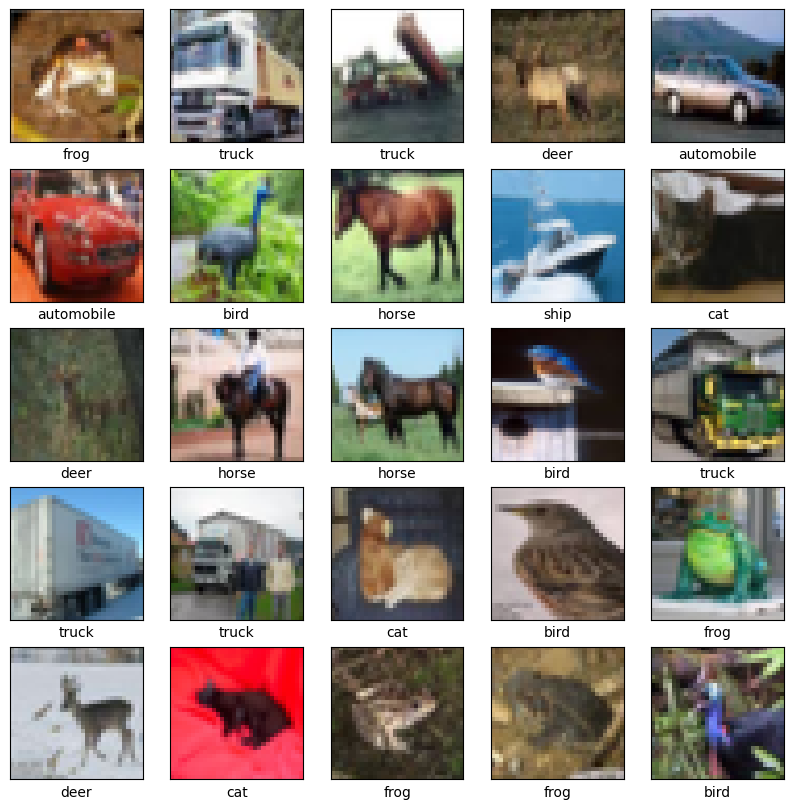

In [5]:
import numpy as np # import numpy
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display a few images with their labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    #plt.xlabel(class_names[y_train[i][0]])
    plt.xlabel(class_names[np.argmax(y_train[i])]) # Use np.argmax to get the index of the highest probability
plt.show()

In [6]:
# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.6796 - loss: 0.9100 - val_accuracy: 0.6947 - val_loss: 0.8912
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.6863 - loss: 0.8848 - val_accuracy: 0.7054 - val_loss: 0.8620
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.6910 - loss: 0.8710 - val_accuracy: 0.7192 - val_loss: 0.8241
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6966 - loss: 0.8672 - val_accuracy: 0.7312 - val_loss: 0.7914
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.7007 - loss: 0.8506 - val_accuracy: 0.7142 - val_loss: 0.8400
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7080 - loss: 0.8395 - val_accuracy: 0.7288 - val_loss: 0.8050
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.7151 - loss: 0.8138 - val_accuracy: 0.7359 - val_loss: 0.7616
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.7141 - loss: 0.8142 - 

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7375 - loss: 0.7863
Test accuracy: 0.7379999756813049


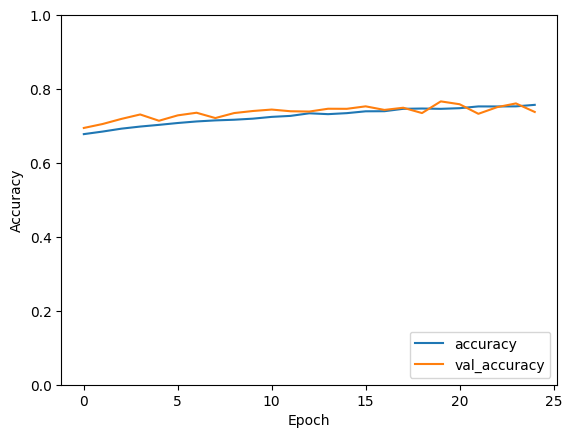

In [13]:
# visualize the accuracy using graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


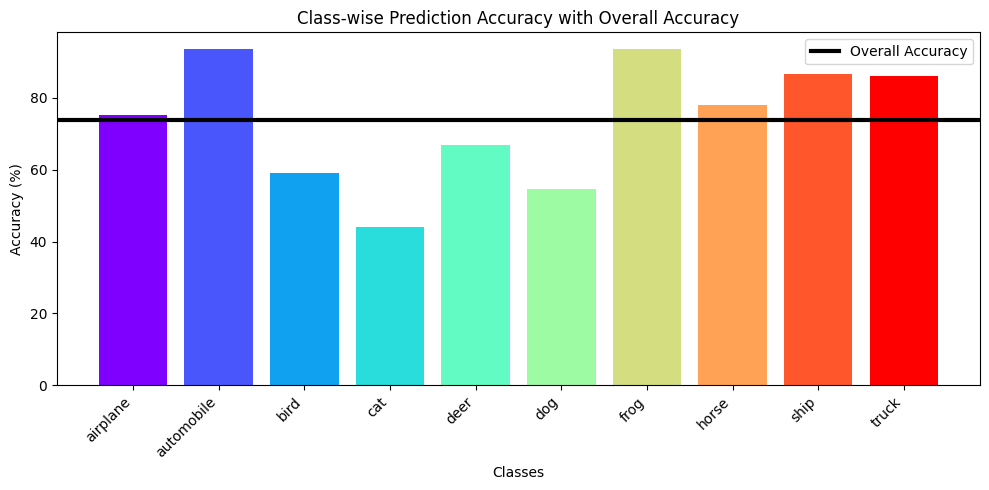

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Get model predictions
predicted_labels = model.predict(x_test)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert predictions to class labels

# Get true labels
true_labels = np.argmax(y_test, axis=1)

# Calculate class-wise accuracy
class_accuracy = []
for class_index in range(10):  # Assuming 10 classes in CIFAR-10
    class_indices = np.where(true_labels == class_index)[0]
    # Calculate accuracy for the current class
    accuracy = np.mean(predicted_labels[class_indices] == true_labels[class_indices]) * 100
    class_accuracy.append(accuracy)

# Calculate overall accuracy
overall_accuracy = np.mean(predicted_labels == true_labels) * 100

# Generate different colors for each bar
colors = cm.rainbow(np.linspace(0, 1, len(class_names)))


plt.figure(figsize=(10, 5))
plt.bar(class_names, class_accuracy, color=colors)  # Set bar colors
plt.axhline(y=overall_accuracy, color='black', linestyle='-', linewidth=3, label='Overall Accuracy')  # Bold line
plt.title('Class-wise Prediction Accuracy with Overall Accuracy')
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()  # Add legend to show overall accuracy line
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


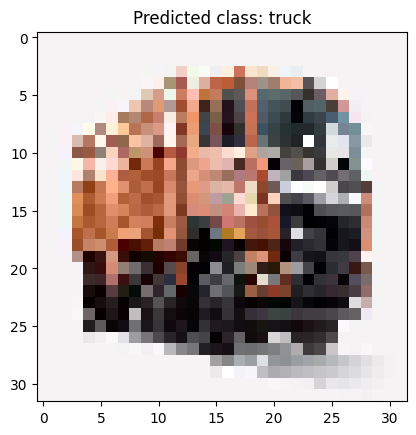

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Get image path from user input
image_path = '/content/truck.jpeg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(32, 32))  # Resize to match CIFAR-10 input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array.astype('float32') / 255.0  # Normalize pixel values

# Make a prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()